# Exploration of Data

In [1]:
import warnings
import pandas as pd
import seaborn as sb
import numpy as np
from matplotlib import pyplot as plt
import plotly.express as pltx
import plotly.io as pi
from IPython.display import Image
import os,sys
sys.path.append(os.path.abspath(os.path.join('..')))
from scripts.dataframe_overview import DfOverview
from scripts.dataframe_cleaner import DfCleaner

In [2]:
cleaned_df_store = pd.read_csv('../data/cleaned_store.csv')
cleaned_df_test = pd.read_csv('../data/cleaned_test.csv')
cleaned_df_train = pd.read_csv('../data/cleaned_train.csv')

In [3]:
sb.set()
%matplotlib inline
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('expand_frame_repr', False)
pd.set_option('display.float_format', '{:.2f}'.format)

* Q.1 Check for distribution in both training and test sets - are the promotions distributed similarly between these two groups?

In [4]:
df_store = cleaned_df_store.copy()
df_train = cleaned_df_train.copy()
df_test = cleaned_df_test.copy()

In [5]:
train_data = cleaned_df_train.copy()
test_data = cleaned_df_test.copy()

In [6]:
def compare(train_data, test_data, feature, title):
  fig, ax = plt.subplots(1, 2, sharex=True, figsize=(12, 4))
  ax[0].set_title("Train data" + title)
  sb.countplot(x=feature, data=train_data, ax=ax[0])
  ax[1].set_title("Test data" + title)
  sb.countplot(x=feature, data=test_data, ax=ax[1])
  fig.subplots_adjust(wspace=0.5)
  fig.show()

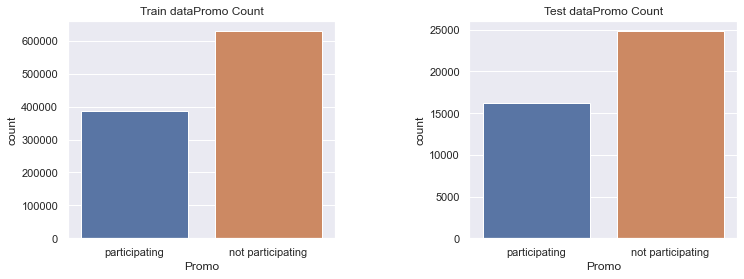

In [7]:
prom = ["not participating", "participating"]
train_data["Promo"] = train_data["Promo"].apply(lambda x: prom[x])
test_data["Promo"] = test_data["Promo"].apply(lambda x: prom[x])
compare(train_data, test_data, 'Promo', "Promo Count")

The distribution is just the same for the training and test data between not participating = 0 and participating = 1 for promotins

In [8]:
state_holidays = ["Normal day", "Public holiday", "Easter holiday", "Christmas"]
s_h_train = train_data.groupby(['StateHoliday']).agg({'StateHoliday': ['count']})
s_h_train.columns = ['count']
s_h_train = s_h_train.reset_index()
s_h_train["StateHoliday"] = s_h_train["StateHoliday"].apply(lambda x: state_holidays[x])
s_h_train

,StateHoliday,count
0,Normal day,986159
1,Public holiday,20260
2,Easter holiday,6690
3,Christmas,4100


In [9]:
state_holidays = ["Normal day", "Public holiday", "Easter holiday", "Christmas"]
s_h_test = test_data.groupby(['StateHoliday']).agg({'StateHoliday': ['count']})
s_h_test.columns = ['count']
s_h_test = s_h_test.reset_index()
s_h_test["StateHoliday"] = s_h_test["StateHoliday"].apply(lambda x: state_holidays[x])
s_h_test

,StateHoliday,count
0,Normal day,40908
1,Public holiday,180


As we can see there is a clear difference when it comes to the distribution of holidays betweeen train and test data! Easter and Christmas are not exist in the test data

* Q.2 Check & compare sales behavior before, during and after holidays
    We have mainly three holidays state holiday(divided into many inside it weekend, easter,...) and school holiday.

In [10]:
df_train_store = pd.merge(df_train.reset_index(), df_store, how='inner', on='Store')
#df_train_store = pd.concat([df_store, df_train], axis=1)
#df_store.merge(df_train, left_on='Store', right_on='Store')
#df_train_store.describe()
df_train_store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 22 columns):
 #   Column                     Non-Null Count    Dtype 
---  ------                     --------------    ----- 
 0   index                      1017209 non-null  int64 
 1   Store                      1017209 non-null  int64 
 2   DayOfWeek                  1017209 non-null  int64 
 3   Date                       1017209 non-null  object
 4   Sales                      1017209 non-null  int64 
 5   Customers                  1017209 non-null  int64 
 6   Open                       1017209 non-null  int64 
 7   Promo                      1017209 non-null  int64 
 8   StateHoliday               1017209 non-null  int64 
 9   SchoolHoliday              1017209 non-null  int64 
 10  StoreType                  1017209 non-null  int64 
 11  Assortment                 1017209 non-null  int64 
 12  CompetitionDistance        1017209 non-null  int64 
 13  CompetitionOpenSinceMonth  

In [11]:
df_train_store['Date'] = pd.DatetimeIndex(df_train_store['Date'])
df_train_store['Year'] = pd.DatetimeIndex(df_train_store['Date']).year
df_train_store['Month'] = pd.DatetimeIndex(df_train_store['Date']).month
df_train_store['Day'] = pd.DatetimeIndex(df_train_store['Date']).day
df_train_store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 25 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   index                      1017209 non-null  int64         
 1   Store                      1017209 non-null  int64         
 2   DayOfWeek                  1017209 non-null  int64         
 3   Date                       1017209 non-null  datetime64[ns]
 4   Sales                      1017209 non-null  int64         
 5   Customers                  1017209 non-null  int64         
 6   Open                       1017209 non-null  int64         
 7   Promo                      1017209 non-null  int64         
 8   StateHoliday               1017209 non-null  int64         
 9   SchoolHoliday              1017209 non-null  int64         
 10  StoreType                  1017209 non-null  int64         
 11  Assortment                 1017209 no

In [12]:
print(df_train_store['Year'].min())
print(df_train_store['Year'].max())

2013
2015


We can see the range of the years for this data is between 2013-2015

In [13]:
df_t_s = df_train_store.copy()

In [14]:
stores_types = ["a", "b", "c", "d"]
df_t_s["StoreType"] = df_t_s["StoreType"].apply(lambda x: stores_types[x])
store_type_df = df_t_s.groupby('StoreType').agg({'Customers': 'mean', 'Sales': 'mean'})
store_type_df = store_type_df.reset_index()
store_type_df

,StoreType,Customers,Sales
0,a,659.03,5738.18
1,b,1987.72,10058.84
2,c,673.27,5723.63
3,d,501.43,5641.82


Store (b) seems to be the best among other stores, it has far higher customers and sales
Now let's look what happened through years 2013-2015

In [15]:
date_df = df_t_s.groupby('Year').agg({'Customers': 'mean', 'Sales': 'mean'})
date_df = date_df.reset_index()
date_df.head()

,Year,Customers,Sales
0,2013,629.04,5658.53
1,2014,643.27,5833.29
2,2015,624.20,5878.25


Ok there isn't a real different!

In [16]:
def plot_trend(df_t_s, columns, feature, title, x_label="", y_label="", labels=['']):
  plt.figure(figsize=(18, 6))
  for i in range(len(columns)):
    sb.lineplot(x=df_t_s.index, y=df_t_s[columns[i]][feature], label=labels[i])
  plt.show()

In [17]:
monthly_trend = df_t_s.groupby(['Month', 'StoreType']).agg( {'Customers': 'mean', 'Sales': 'mean'})
monthly_trend = monthly_trend.unstack().swaplevel(0, 1, 1).sort_index(1)

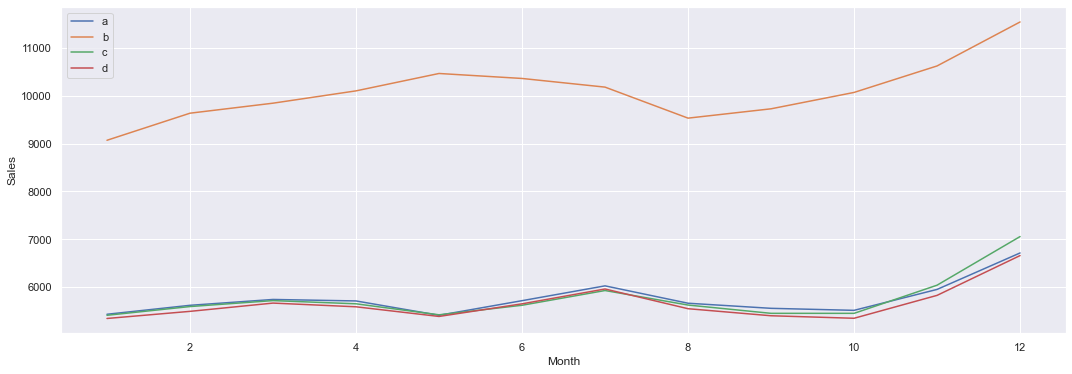

In [18]:
columns = ["a", "b", "c", "d"]
plot_trend(monthly_trend, columns, 'Sales', 'Average Monthly sales', labels=columns)

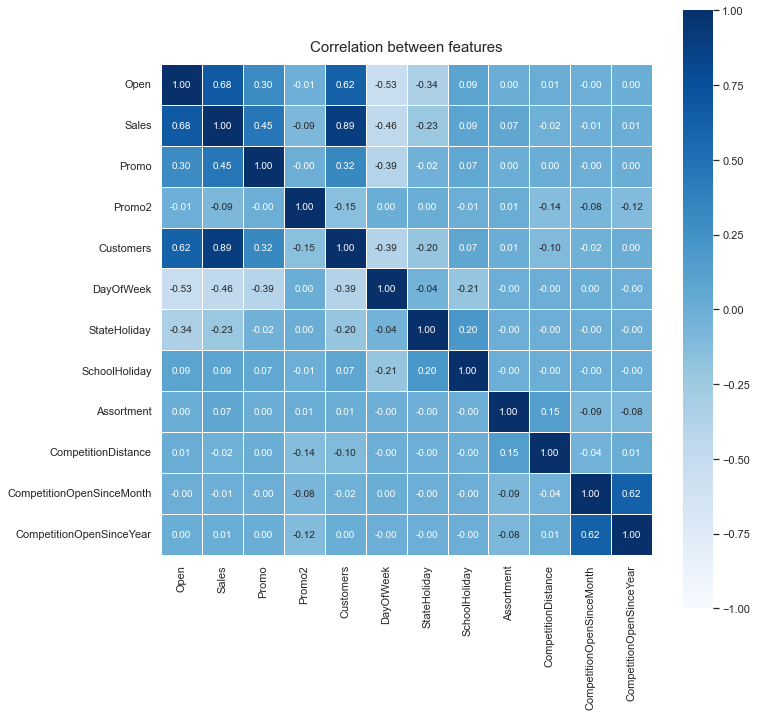

In [19]:
df_t_s = df_t_s.copy()
corr_all = df_t_s[['Open', 'Sales', 'Promo', 'Promo2', 'Customers', 'DayOfWeek', 'StateHoliday', 'SchoolHoliday', 'StoreType',
                           'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear']].corr()

fig, ax = plt.subplots(figsize=(11, 11))
heatmap = sb.heatmap(corr_all, square=True, linewidths=.5,
                      vmin=-1, vmax=1, cmap='Blues', annot=True, fmt='.2f')

heatmap.set_title('Correlation between features', fontdict={'fontsize': 15}, pad=13)
fig.show()

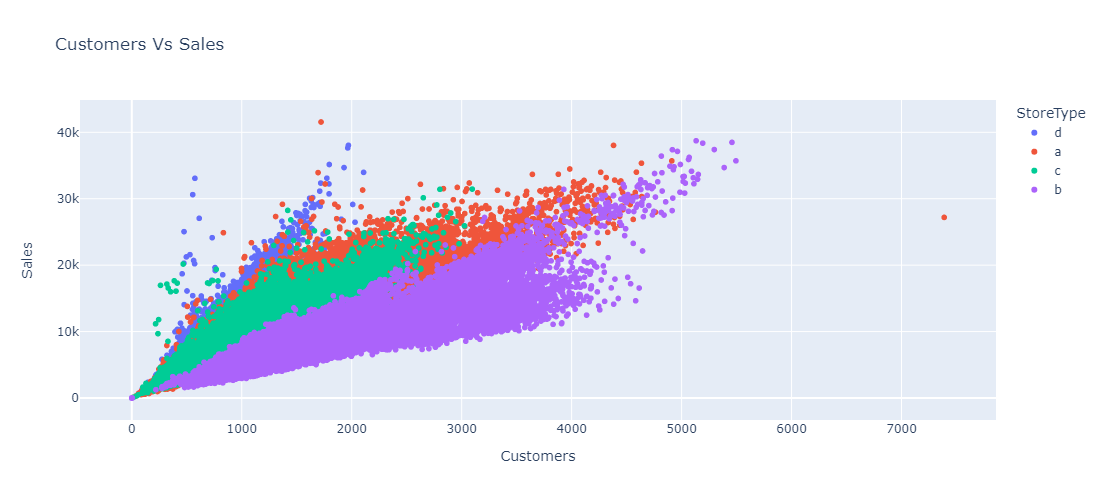

In [20]:
import plotly.io as pl
import kaleido
df_t_s = df_t_s.copy()
df_t_s["StoreType"] = df_t_s["StoreType"]
# .apply(lambda x: stores_types[x])
df_t_s = df_t_s.sort_values(by='Day', ascending=False)
df_t_s = df_t_s.sort_values(by='Month', ascending=False)
fig = pltx.scatter(df_t_s, x="Customers", y="Sales", color="StoreType", title="Customers Vs Sales")
Image(pl.to_image(fig, format='png', width=1100))
# fig.show()

It's clear that increasing of customers mean increase sales

In [21]:
df_t_s["Promo"] = df_t_s["Promo"]
df_t_s["Promo2"] = df_t_s["Promo2"]
overall_trend = df_t_s.groupby(['Promo', 'Promo2',]).agg({'Customers': 'mean', 'Sales': 'mean'})
overall_trend

Customers   Sales
Promo Promo2                   
0     0          578.45 4722.19
      1          457.43 4091.11
1     0          904.40 8393.78
      1          735.78 7588.42

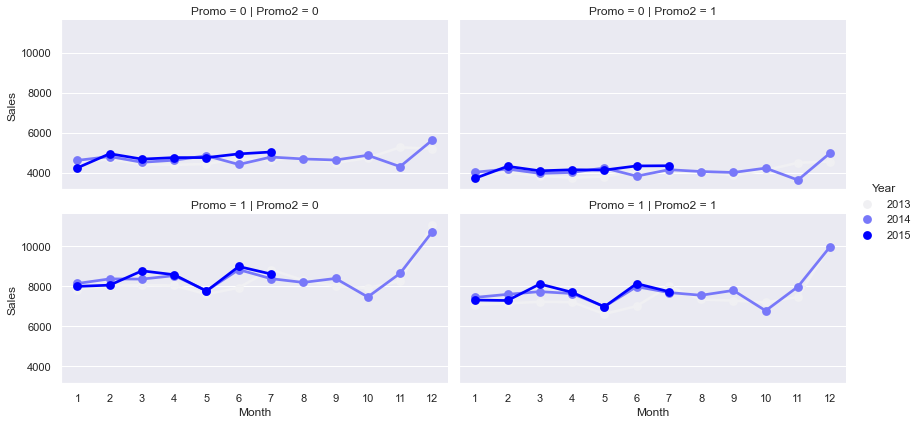

In [22]:
plot = sb.factorplot(data=df_t_s, x='Month', y="Sales", hue='Year',
                    row='Promo', col='Promo2', color='blue', size=3, aspect=2)

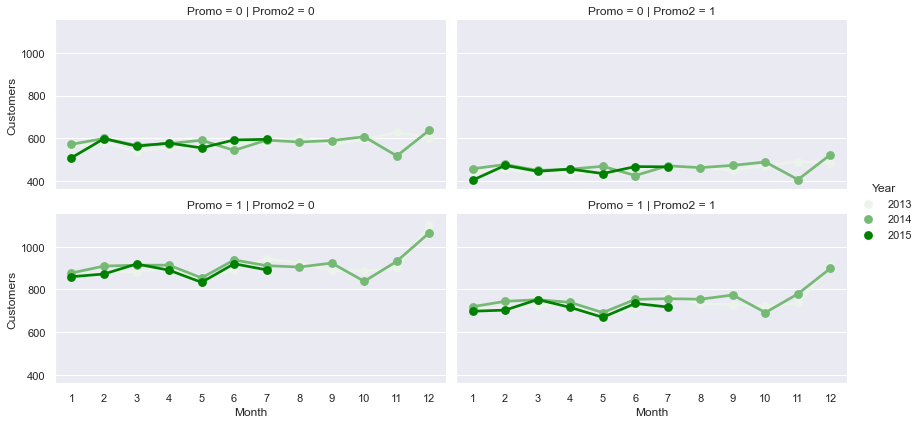

In [23]:
plot = sb.factorplot(data=df_t_s, x='Month', y="Customers", hue='Year',
                    row='Promo', col='Promo2', color='green', size=3, aspect=2)

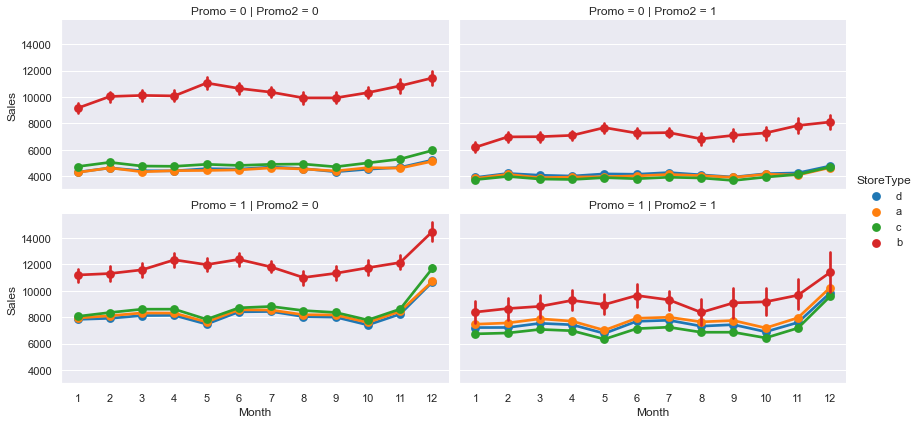

In [24]:
plot = sb.factorplot(data=df_t_s, x='Month', y="Sales", palette='tab10', hue='StoreType',
                    row='Promo', col='Promo2', color='mako', size=3, aspect=2)

Trend of customers during store open and closing time

In [25]:
open_days = df_t_s[df_t_s['Open'] == 1]
closed_days = df_t_s[df_t_s['Open'] == 0]
open_days.groupby('Date')["Customers"].mean()

Date
2013-01-01   1146.53
2013-01-02    750.74
2013-01-03    686.24
2013-01-04    705.90
2013-01-05    621.02
               ...  
2015-07-27    871.93
2015-07-28    787.14
2015-07-29    744.41
2015-07-30    771.38
2015-07-31    870.28
Name: Customers, Length: 942, dtype: float64

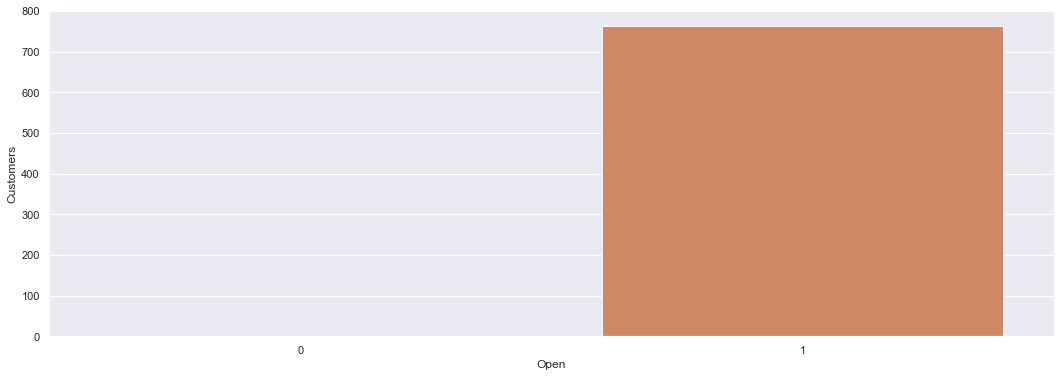

In [26]:
df_t_s["Open"] = df_t_s["Open"]
plt.figure(figsize=(18, 6))
sb.barplot(x='Open', y='Customers', data=df_t_s)
plt.show()

In [27]:
weekly_data = df_t_s.groupby(['DayOfWeek']).agg({'DayOfWeek': 'count', 'Customers': 'mean', 'Sales': 'mean'})
weekly_data.columns = ['count', 'Customers', 'Sales']
weekly_data

,count,Customers,Sales
DayOfWeek,,,
1,144730,813.07,7809.04
2,145664,760.98,7005.24
3,145665,721.64,6555.88
4,145845,697.54,6247.58
5,145845,743.15,6723.27
6,144730,657.11,5847.56
7,144730,35.79,204.18


<AxesSubplot:xlabel='Assortment', ylabel='Customers'>

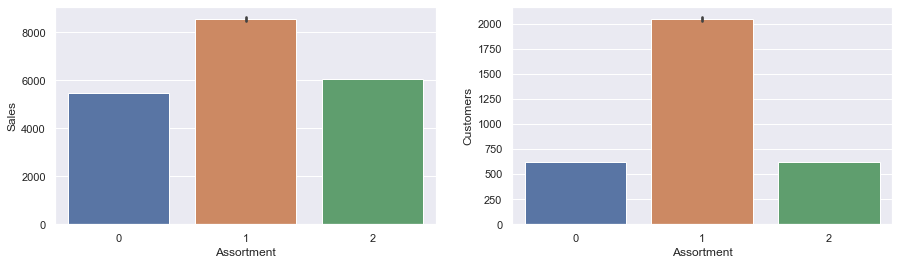

In [28]:
assortment = ['basic', 'extra', 'extended']
weekdays_data = df_t_s[df_t_s['DayOfWeek'] < 6]
weekend_data = df_t_s[df_t_s['DayOfWeek'] >= 6]
df_t_s["Assortment"] = df_t_s["Assortment"]
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(15, 4))

sb.barplot(x='Assortment', y='Sales', data=df_t_s, ax=axis1)
sb.barplot(x='Assortment', y='Customers', data=df_t_s, ax=axis2)

In [29]:
competition = df_t_s.groupby("Store").agg({ "Sales": "sum", 
                                           "Customers": "sum",
                                           "CompetitionDistance": "mean",
                                           "CompetitionOpenSinceMonth": "mean",
                                           "CompetitionOpenSinceYear": "mean"
                                           })
competition

,Sales,Customers,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear
Store,,,,,
1,3716854,440523,1270.00,9.00,2008.00
2,3883858,457855,570.00,11.00,2007.00
3,5408261,584310,14130.00,12.00,2006.00
4,7556507,1036254,620.00,9.00,2009.00
5,3642818,418588,29910.00,4.00,2015.00
...,...,...,...,...,...
1111,4091076,351883,1900.00,6.00,2014.00
1112,7974294,653276,1880.00,4.00,2006.00
1113,5196242,562151,9260.00,1.00,1990.00


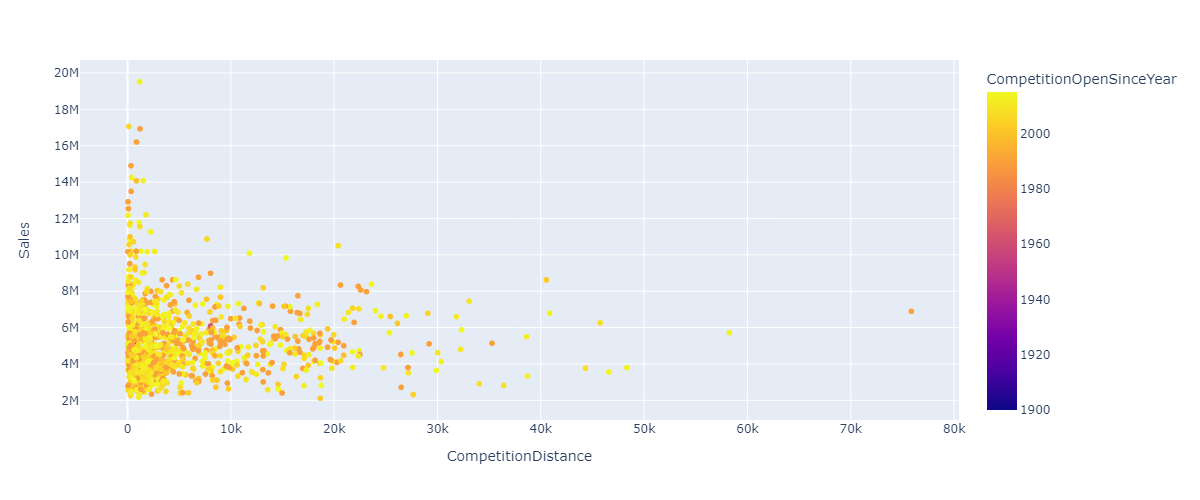

In [30]:
fig = pltx.scatter(competition, 
                 x="CompetitionDistance", 
                 y="Sales", color='CompetitionOpenSinceYear')
Image(pi.to_image(fig, format='png', width=1200))

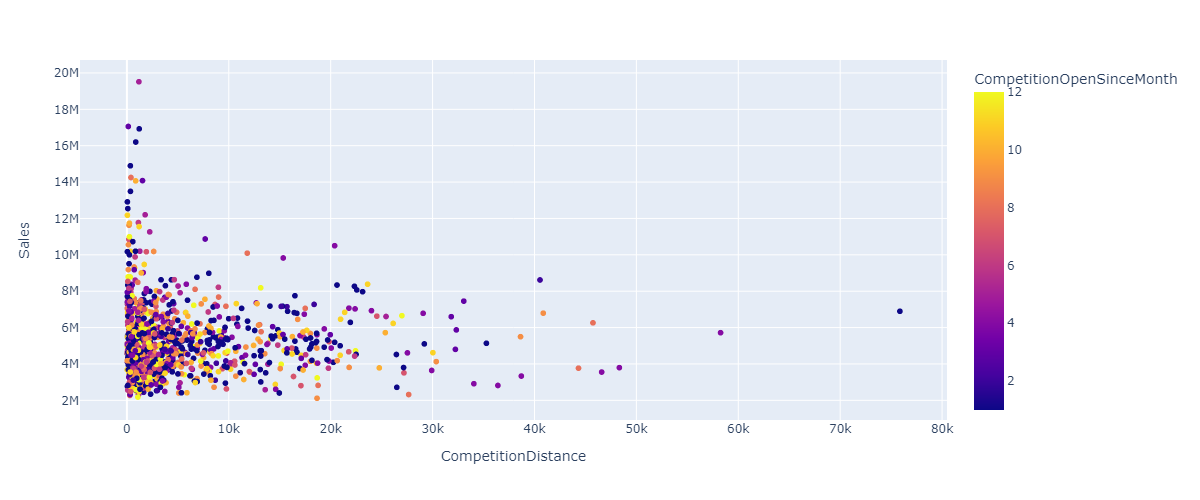

In [31]:
fig = pltx.scatter(competition, 
                 x="CompetitionDistance", 
                 y="Sales", color='CompetitionOpenSinceMonth')
Image(pi.to_image(fig, format='png', width=1200))

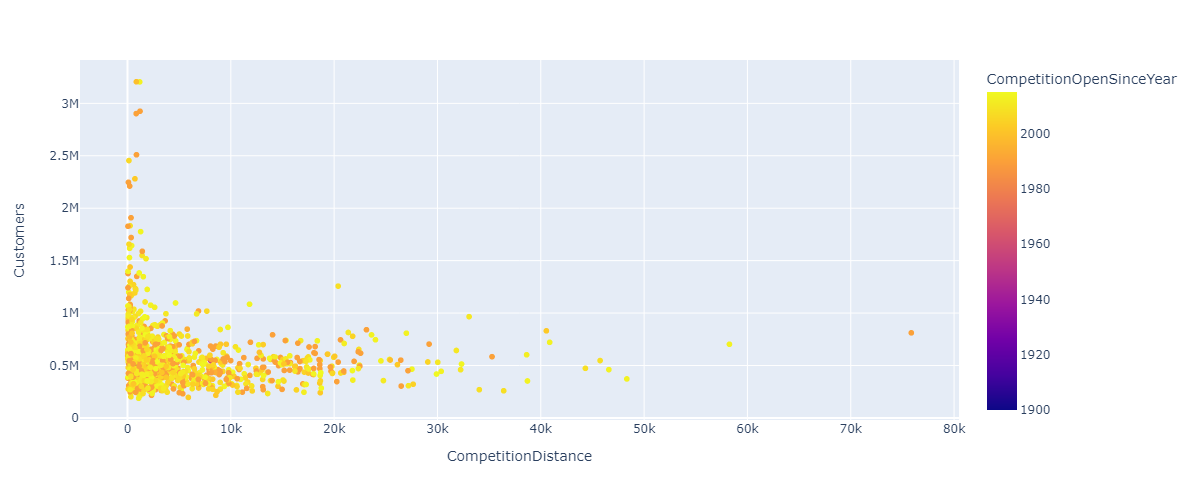

In [32]:
fig = pltx.scatter(competition, x="CompetitionDistance", y="Customers", color="CompetitionOpenSinceYear")
Image(pi.to_image(fig, format='png', width=1200))